In [1]:
import ginsim

In [13]:
import pandas as pd 
from colomoto_jupyter import tabulate
import seaborn as sns

In [3]:
model = ginsim.load("Mar2023.zginml")

In [4]:
ginsim.show(model)

In [5]:
import biolqm

In [6]:
lqm = ginsim.to_biolqm(model)

In [7]:
fps = biolqm.fixpoints(lqm)

In [17]:
fps_df = tabulate(fps)
fps_df

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1


In [18]:
cm = sns.light_palette("green", as_cmap=True)

fps_df.style.background_gradient(cmap=cm)

,Egfr,pGro,Wg,Hh,Dr,ind,vnd,en,wg,gsb,svp,ac,NB7_4,NB7_1,NB5_6,NB5_3,NB5_2,NB6_2,Ptc,Ci_act,Ci_rep,Fz,Smo,Arm,Pan,Rl,Pnt,Gro,hh,hkb
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0
3,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1
7,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0
8,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
9,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1


In [22]:
# Create a dictionary of steady states and their "classification" - according to Ǒzlem

steady_states = {}
steady_states[0] = 'NE'
steady_states[1] = '5-6'
steady_states[2] = '7-4'
steady_states[3] = 'NP'
steady_states[4] = 'NE'
steady_states[5] = '5-3'
steady_states[6] = 'NP'
steady_states[7] = '6-2'
steady_states[8] = 'NE'
steady_states[9] = 'NE'
steady_states[10] = '5-2'
steady_states[11] = '5-3'
steady_states[12] = 'NP'
steady_states[13] = 'NP'
steady_states[14] = '7-1'
steady_states[15] = '6-2'

In [24]:
steady_states

{0: 'NE',
 1: '5-6',
 2: '7-4',
 3: 'NP',
 4: 'NE',
 5: '5-3',
 6: 'NP',
 7: '6-2',
 8: 'NE',
 9: 'NE',
 10: '5-2',
 11: '5-3',
 12: 'NP',
 13: 'NP',
 14: '7-1',
 15: '6-2'}

In [9]:
print(len(fps), "fixpoints")

16 fixpoints


Visualize stable satates 

In [59]:
ginsim.show(model, fps[0])

In [29]:
masim = ginsim.to_maboss(model)

In [30]:
# masim.network.set_output(('Dr', 'ind', 'vnd','en','wg','gsb','svp','ac'))  # markers
masim.network.set_output(('NB5_6', 'NB5_3', 'NB5_2', 'NB6_2', 'NB7_4', 'NB7_1'))

In [31]:
maboss.set_nodes_istate(masim, ["Hh", "Wg", "Egfr", 'pGro'], 
                          [0.5, 0.5])

In [32]:
print(masim.get_initial_state())

{'Egfr': [0, 1], 'pGro': [0, 1], 'Wg': [0, 1], 'Hh': [0, 1], 'Dr': 0, 'ind': 0, 'vnd': 0, 'en': 0, 'wg': 0, 'gsb': 0, 'svp': 0, 'ac': 0, 'NB7_4': 0, 'NB7_1': 0, 'NB5_6': 0, 'NB5_3': 0, 'NB5_2': 0, 'NB6_2': 0, 'Ptc': 0, 'Ci_act': 0, 'Ci_rep': 0, 'Fz': 0, 'Smo': 0, 'Arm': 0, 'Pan': 0, 'Rl': 0, 'Pnt': 0, 'Gro': 0, 'hh': 0, 'hkb': 0}


In [33]:
res = masim.run()

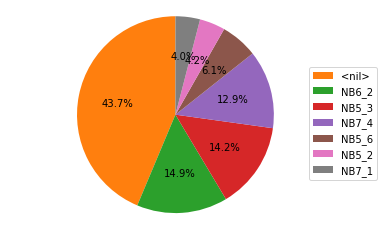

In [34]:
res.plot_piechart() 

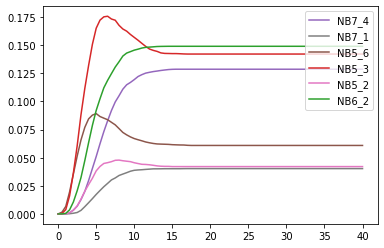

In [35]:
res.plot_node_trajectory(until=40)

In [58]:
# restable = res.get_fptable()
print(res.get_last_states_probtraj())

           <nil>   NB5_2   NB5_3   NB5_6   NB6_2   NB7_1   NB7_4
999.0000  0.4367  0.0421  0.1422  0.0609  0.1491  0.0403  0.1287


In [36]:
print(res.get_fptable())  # can derive percentages myself, i.e one 7-4 is NP...

     FP   Proba                                              State  Egfr  \
0    #1  0.0659  Wg -- Dr -- Gro -- Pan -- en -- Ptc -- ac -- s...     0   
1    #2  0.0628  Wg -- Hh -- Dr -- Gro -- Pan -- en -- gsb -- a...     0   
2    #3  0.0646                         Dr -- Gro -- Ci_rep -- Ptc     0   
3    #4  0.0813  Egfr -- pGro -- Rl -- Wg -- ind -- Pnt -- Pan ...     1   
4    #5  0.0623         pGro -- ind -- Ci_rep -- Ptc -- svp -- hkb     0   
5    #6  0.0607  pGro -- Wg -- Hh -- ind -- Pan -- en -- gsb --...     0   
6    #7  0.0853  Egfr -- pGro -- Rl -- Hh -- ind -- Pnt -- Ci_a...     1   
7    #8  0.0850  Egfr -- pGro -- Rl -- ind -- Pnt -- Ci_rep -- ...     1   
8    #9  0.0569  pGro -- Hh -- ind -- Ci_act -- wg -- gsb -- sv...     0   
9   #10  0.0884  Egfr -- pGro -- Rl -- Wg -- Hh -- ind -- Pnt -...     1   
10  #11  0.0609  Hh -- Dr -- Gro -- Ci_act -- wg -- gsb -- NB5_...     0   
11  #12  0.0622  pGro -- Wg -- ind -- Pan -- en -- Ptc -- svp -...     0   
12  #13  0.0

In [41]:
# import biosimulators_ginsim as simulator # tutorial  not clear https://docs.biosimulators.org/Biosimulators_GINsim/source/biosimulators_ginsim.html

To Do: mutations analysis (1 at a time, 2 at a time etc...)

In [47]:
output_nodes = ['NB7_4', 'NB7_1', 'NB5_6', 'NB5_3', 'NB5_2', 'NB6_2']
mutants = [node for node in masim.network if node not in output_nodes]

In [51]:
import matplotlib.pyplot as plt

In [60]:
for mut in mutants:
    masim_copy = masim.copy()
    masim_copy.mutate(mut, 'OFF')
    mares = masim_copy.run()
    # mares.plot_piechart()
    name = mut+'/--'
    print(name)
    # print(mares.get_fptable())

    mares.get_fptable().to_csv("KO_" + mut + ".csv")
    # plt.title("%s mutant" %name)

Egfr/--
pGro/--
Wg/--
Hh/--
Dr/--
ind/--
vnd/--
en/--
wg/--
gsb/--
svp/--
ac/--
Ptc/--
Ci_act/--
Ci_rep/--
Fz/--
Smo/--
Arm/--
Pan/--
Rl/--
Pnt/--
Gro/--
hh/--
hkb/--
